**Working with Images & Logistic Regression in PyTorch**

In [1]:
#@ Importing the required libraries and dependencies
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [2]:
#@ Downloading the training dataset
data = MNIST(root='data/', download=True)
#@ Downloading the test dataset
test_data = MNIST(root='data/', train=False)

In [3]:
#@ Checking the size of the dataset
len(data)

60000

In [4]:
data[1]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F20D90E8850>, 0)

Label 0


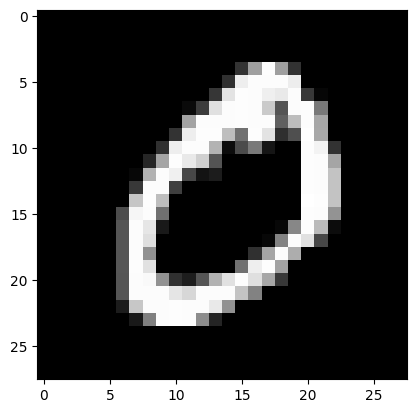

In [5]:
#@ Plotting the image
image, label = data[1]
plt.imshow(image, cmap='gray')
print('Label', label)

Label 4


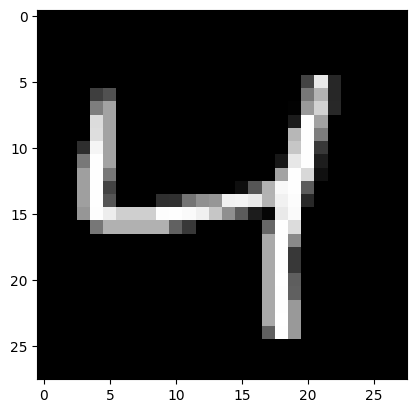

In [6]:
#@ Plotting the image
image, label = data[2]
plt.imshow(image, cmap='gray')
print('Label', label)

In [7]:
#@ Convert images into PyTorch tensors
data = MNIST(root='data/',
            train=True,
            transform=transforms.ToTensor())

img_tensor, label = data[1]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 0


In [8]:
#@ Look some sample values inside the tensor
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.9333, 0.9882, 0.9882, 0.7020, 0.0471],
        [0.9922, 0.9137, 0.8157, 0.3294, 0.0000],
        [0.9412, 0.2784, 0.0745, 0.1098, 0.0000],
        [0.2471, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor(1.) tensor(0.)


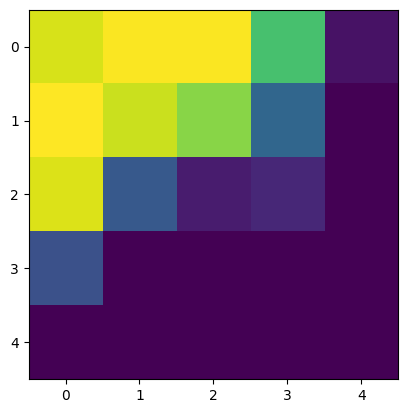

In [9]:
#@ Plot the image by passing in the 28*28 matrix
plt.imshow(img_tensor[0, 10:15, 10:15])

## Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images. 

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [10]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(data, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [11]:
#@ Creating data loaders to load the data in batches
from torch.utils.data import DataLoader
batch_size=128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [12]:
import torch.nn as nn

input_size = 28*28
num_classes = 10
model = nn.Linear(input_size, num_classes)

In [13]:
#@ Looking the weights and biases
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0185, -0.0124,  0.0004,  ..., -0.0343,  0.0048, -0.0071],
        [ 0.0044, -0.0003,  0.0279,  ..., -0.0072,  0.0199, -0.0266],
        [-0.0320,  0.0267, -0.0207,  ...,  0.0321,  0.0320, -0.0223],
        ...,
        [-0.0007, -0.0089, -0.0214,  ...,  0.0185, -0.0077,  0.0291],
        [-0.0257,  0.0238, -0.0335,  ..., -0.0041,  0.0353,  0.0273],
        [-0.0345,  0.0256,  0.0322,  ..., -0.0065, -0.0345, -0.0306]],
       requires_grad=True)

In [14]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0233,  0.0267,  0.0067, -0.0185,  0.0043,  0.0219, -0.0196,  0.0057,
         0.0134, -0.0337], requires_grad=True)

In [15]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([5, 1, 2, 8, 1, 4, 8, 3, 0, 1, 2, 6, 5, 7, 4, 8, 4, 8, 8, 2, 1, 2, 2, 2,
        3, 9, 3, 1, 1, 7, 7, 2, 2, 1, 8, 7, 2, 3, 0, 0, 0, 1, 6, 7, 2, 8, 7, 9,
        2, 7, 0, 5, 9, 2, 6, 6, 4, 7, 1, 7, 2, 3, 8, 8, 6, 2, 1, 2, 3, 7, 3, 1,
        4, 6, 6, 3, 0, 4, 8, 6, 9, 7, 1, 4, 9, 0, 5, 3, 1, 0, 1, 0, 6, 6, 4, 9,
        4, 5, 4, 0, 0, 8, 0, 9, 4, 7, 6, 3, 0, 1, 6, 1, 2, 3, 3, 7, 8, 2, 9, 8,
        9, 3, 6, 8, 4, 7, 7, 7])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

In [16]:
images.shape

torch.Size([128, 1, 28, 28])

In [17]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [18]:
#@ extend nn.Module class from PyTorch for defining custom model
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [19]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [20]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0171,  0.0258, -0.0293,  ..., -0.0307,  0.0021, -0.0318],
         [-0.0297,  0.0206, -0.0155,  ...,  0.0170,  0.0041,  0.0279],
         [-0.0079,  0.0044,  0.0233,  ..., -0.0348, -0.0167,  0.0318],
         ...,
         [ 0.0192, -0.0080, -0.0157,  ...,  0.0131,  0.0334,  0.0048],
         [-0.0220, -0.0080, -0.0215,  ..., -0.0356, -0.0302,  0.0018],
         [-0.0273, -0.0279, -0.0074,  ..., -0.0022, -0.0317, -0.0172]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0123,  0.0151, -0.0163,  0.0324, -0.0253,  0.0111,  0.0236,  0.0051,
          0.0060,  0.0035], requires_grad=True)]

In [21]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs shape: ', outputs.shape)
print('\nsample outputs: \n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs shape:  torch.Size([128, 10])

sample outputs: 
 tensor([[ 0.3175, -0.0610, -0.3529, -0.1173, -0.0636, -0.0420, -0.0374,  0.2803,
         -0.0718, -0.3880],
        [ 0.0902, -0.3167, -0.1654, -0.1198, -0.1617, -0.0964, -0.0182, -0.0748,
          0.3708, -0.0238]])


In [22]:
import torch.nn.functional as F
outputs[:2]

tensor([[ 0.3175, -0.0610, -0.3529, -0.1173, -0.0636, -0.0420, -0.0374,  0.2803,
         -0.0718, -0.3880],
        [ 0.0902, -0.3167, -0.1654, -0.1198, -0.1617, -0.0964, -0.0182, -0.0748,
          0.3708, -0.0238]], grad_fn=<SliceBackward0>)

In [23]:
#@ Applying softmax for each output row
probs = F.softmax(outputs, dim=1)
print('sample probabilities:\n', probs[:2].data)     # looking sample probabilities
print('sum: ', torch.sum(probs[0]).item())

sample probabilities:
 tensor([[0.1416, 0.0970, 0.0724, 0.0917, 0.0967, 0.0989, 0.0993, 0.1365, 0.0960,
         0.0699],
        [0.1134, 0.0755, 0.0878, 0.0919, 0.0881, 0.0941, 0.1017, 0.0961, 0.1501,
         0.1012]])
sum:  0.9999999403953552


In [24]:
#@ comparing the predicted labels with actual labels
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

print(labels)

tensor([0, 8, 9, 8, 3, 4, 4, 4, 4, 7, 0, 3, 7, 3, 8, 4, 6, 4, 8, 3, 4, 3, 8, 4,
        3, 4, 8, 7, 8, 7, 0, 8, 0, 2, 4, 8, 3, 3, 6, 3, 2, 3, 4, 0, 3, 7, 0, 3,
        1, 0, 6, 6, 9, 7, 0, 8, 7, 0, 3, 4, 0, 0, 6, 8, 4, 6, 2, 0, 8, 6, 0, 2,
        7, 0, 9, 2, 2, 2, 4, 1, 4, 4, 4, 4, 7, 1, 7, 3, 2, 3, 0, 7, 0, 8, 3, 3,
        2, 3, 8, 0, 7, 2, 4, 1, 1, 8, 0, 0, 0, 3, 0, 8, 0, 8, 8, 0, 8, 0, 0, 8,
        4, 8, 0, 9, 8, 7, 4, 0])
tensor([0.1416, 0.1501, 0.1090, 0.1230, 0.1655, 0.1285, 0.1207, 0.1322, 0.1226,
        0.1426, 0.1185, 0.1155, 0.1612, 0.1267, 0.1209, 0.1274, 0.1323, 0.1253,
        0.1151, 0.1452, 0.1241, 0.1324, 0.1231, 0.1218, 0.1359, 0.1314, 0.1147,
        0.1255, 0.1245, 0.1165, 0.1336, 0.1328, 0.1435, 0.1320, 0.1424, 0.1127,
        0.1223, 0.1507, 0.1226, 0.1156, 0.1160, 0.1244, 0.1294, 0.1268, 0.1565,
        0.1291, 0.1475, 0.1346, 0.1536, 0.1341, 0.1274, 0.1391, 0.1177, 0.1292,
        0.1169, 0.1310, 0.1372, 0.1106, 0.1186, 0.1224, 0.1549, 0.1180, 0.1155,
       

**Evaluation Metrics and Loss Function**

In [25]:
outputs[:2]

tensor([[ 0.3175, -0.0610, -0.3529, -0.1173, -0.0636, -0.0420, -0.0374,  0.2803,
         -0.0718, -0.3880],
        [ 0.0902, -0.3167, -0.1654, -0.1198, -0.1617, -0.0964, -0.0182, -0.0748,
          0.3708, -0.0238]], grad_fn=<SliceBackward0>)

In [26]:
torch.sum(preds == labels)

tensor(12)

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

accuracy(outputs, labels)

tensor(0.0938)

In [28]:
probs

tensor([[0.1416, 0.0970, 0.0724,  ..., 0.1365, 0.0960, 0.0699],
        [0.1134, 0.0755, 0.0878,  ..., 0.0961, 0.1501, 0.1012],
        [0.1084, 0.0946, 0.0906,  ..., 0.1072, 0.1007, 0.1090],
        ...,
        [0.1142, 0.1135, 0.0905,  ..., 0.1246, 0.0897, 0.0947],
        [0.1082, 0.1056, 0.1147,  ..., 0.0939, 0.1128, 0.0857],
        [0.1520, 0.0980, 0.0936,  ..., 0.1285, 0.0813, 0.1030]],
       grad_fn=<SoftmaxBackward0>)

In [29]:
outputs

tensor([[ 0.3175, -0.0610, -0.3529,  ...,  0.2803, -0.0718, -0.3880],
        [ 0.0902, -0.3167, -0.1654,  ..., -0.0748,  0.3708, -0.0238],
        [ 0.0123, -0.1236, -0.1670,  ...,  0.0013, -0.0618,  0.0175],
        ...,
        [ 0.0973,  0.0910, -0.1351,  ...,  0.1843, -0.1450, -0.0898],
        [ 0.0474,  0.0230,  0.1054,  ..., -0.0948,  0.0883, -0.1857],
        [ 0.4196, -0.0188, -0.0650,  ...,  0.2516, -0.2061,  0.0311]],
       grad_fn=<AddmmBackward0>)

In [30]:
loss_fn = F.cross_entropy

In [31]:
#@ Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3189, grad_fn=<NllLossBackward0>)


**Training the model**

In [32]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []                             # record epoch wise results
    
    for epoch in range(epochs):
        #@ Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        #@ Validation Phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [33]:
#@ Lets evaluate the function
l1 = [1, 2, 3, 4, 5]
l2 = [x*2 for x in l1]
print(l2)

[2, 4, 6, 8, 10]


In [34]:
#@ Let's evaluate 
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [35]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)         # generate predictions
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [36]:
#@ Checking how the model performs on validation set
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.340096950531006, 'val_acc': 0.08623417466878891}

In [37]:
#@ training the model
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9733, val_acc: 0.6148
Epoch [1], val_loss: 1.6984, val_acc: 0.7231
Epoch [2], val_loss: 1.4926, val_acc: 0.7561
Epoch [3], val_loss: 1.3374, val_acc: 0.7778
Epoch [4], val_loss: 1.2180, val_acc: 0.7921


In [38]:
#@ training the model
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1243, val_acc: 0.8030
Epoch [1], val_loss: 1.0492, val_acc: 0.8107
Epoch [2], val_loss: 0.9879, val_acc: 0.8177
Epoch [3], val_loss: 0.9368, val_acc: 0.8223
Epoch [4], val_loss: 0.8938, val_acc: 0.8259


In [39]:
#@ training the model
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8570, val_acc: 0.8313
Epoch [1], val_loss: 0.8251, val_acc: 0.8337
Epoch [2], val_loss: 0.7972, val_acc: 0.8373
Epoch [3], val_loss: 0.7726, val_acc: 0.8395
Epoch [4], val_loss: 0.7507, val_acc: 0.8409


In [40]:
#@ training the model
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7311, val_acc: 0.8432
Epoch [1], val_loss: 0.7134, val_acc: 0.8451
Epoch [2], val_loss: 0.6974, val_acc: 0.8464
Epoch [3], val_loss: 0.6827, val_acc: 0.8485
Epoch [4], val_loss: 0.6694, val_acc: 0.8499


Text(0.5, 1.0, 'Accuracy v/s No. of epochs')

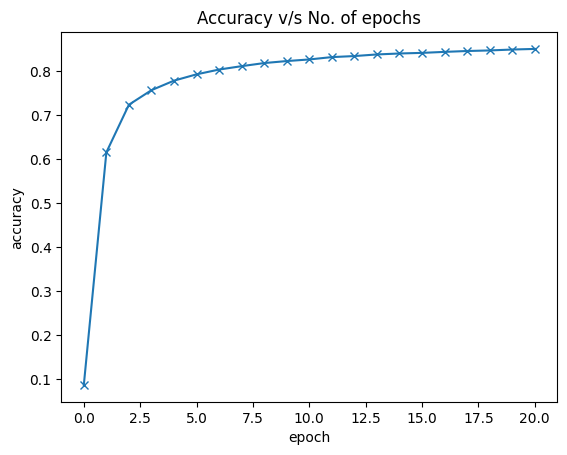

In [41]:
#@ Lets visualize the training accuracy using line graph
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy v/s No. of epochs')

- Here, we can see that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this might be the learning rate might be too high. We can try reducing the learning rate and training for a few more epochs 
- Also, other reason might be that the model isn't powerful enough. We might need more sophisticated models that can capture non-linear relationship between image pixels and labels for complex task like recognizing everyday objects, animals, etc

**Testing with individual images**

In [42]:
#@ Testing the dataset
test_dataset = MNIST(root='data/',
                    train=False,
                    transform=transforms.ToTensor())

Shape:0, img.shape
Label: 8


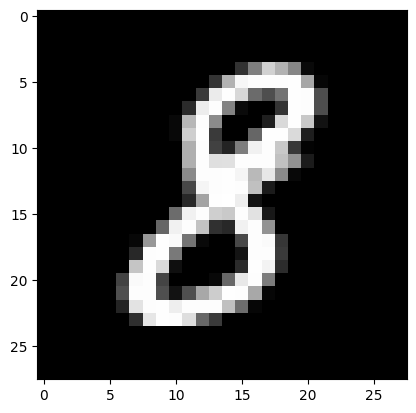

In [43]:
#@ Taking sample image from the dataset
img, label = test_dataset[110]
plt.imshow(img[0], cmap='gray')
print('Shape:0, img.shape')
print('Label:', label)

In [44]:
#@ Defining helper function for predicting image
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Here, `img.unsqueeze()` adds another dimension at the beginning of the tensor, which the model views as batch containing a single image

Label: 8 , Predicted:  8


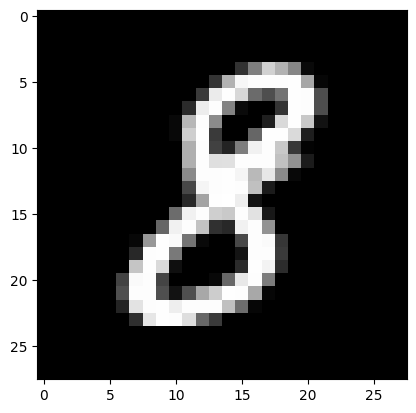

In [45]:
#@ Predicting the image with model
img, label = test_dataset[110]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted: ', predict_image(img, model))

Label: 9 , Predicted:  3


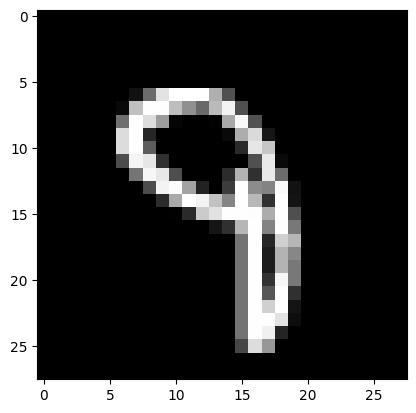

In [46]:
#@ Predicting the image with model
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted: ', predict_image(img, model))

In [47]:
#@ Checking overall loss and accuracy of the model in test set
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
print(result)

{'val_loss': 0.6428807973861694, 'val_acc': 0.8607422113418579}
